In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [17]:
print("Number of Variables in Train Data: " + str(len(train_data.columns)))
print("Number of Variables in Train Data: " + str(len(test_data.columns)))

Number of Variables in Train Data: 81
Number of Variables in Train Data: 80


In [21]:
list(set(train_data.columns) - set(test_data.columns))

['SalePrice']

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [93]:
def plot_med_price(feature, data, x_dim=6, y_dim=4, rot=0):
    fig, ax = plt.subplots(figsize = (x_dim, y_dim))
    plt.xticks(rotation=rot)
    fig = sns.barplot(data = data , x = feature , y = "SalePrice", estimator=np.median).set_title(f"{feature} Vs Sale Price")
    plt.show()
    
def plot_scatter(feature, data, x_dim=6, y_dim=4):
    fig, ax = plt.subplots(figsize = (x_dim, y_dim))
    plt.scatter(x = data[feature], y = data["SalePrice"])

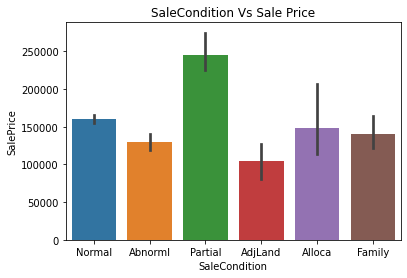

In [84]:
plot_med_price("SaleCondition", train_data)

Comments:
- New homes characterised by a Partial finish generally sell for a higher price
- With Adjoining Land Purchase for less which is suprising - more rural location rather than suburban or city dwelling

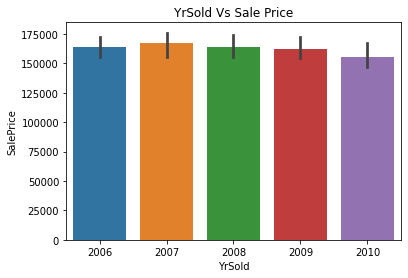

In [85]:
plot_med_price("YrSold", train_data)

House prices generally declining from 2006 to 2010 - makes sense given house price crash in the US

Need to make some time series adjustment for this trend, would need to research best method for this

In [86]:
train_data["MonthYear"] = train_data["YrSold"].astype(str) + '-' + train_data["MoSold"].astype(str) + '-01'

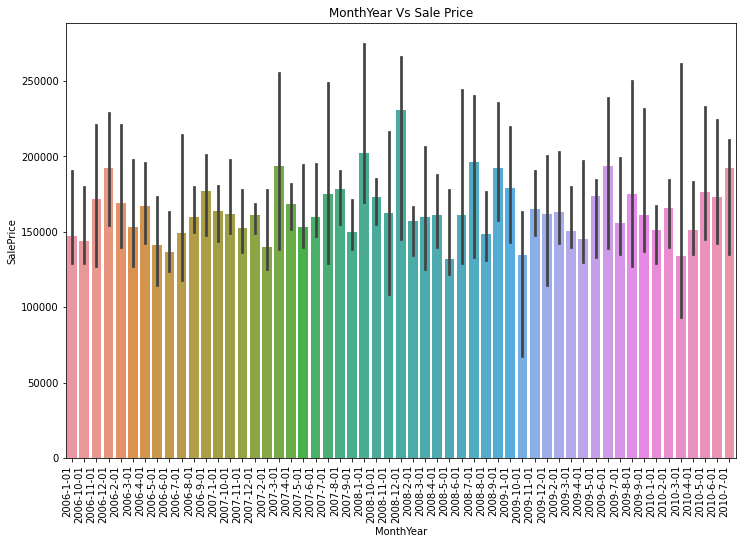

In [87]:
fig, ax = plt.subplots(figsize = (12,8))    
fig = sns.barplot(data = train_data , x = "MonthYear" , y = "SalePrice"
                  , estimator=np.median).set_title("MonthYear Vs Sale Price")
x_dates = train_data['MonthYear'].sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')
plt.show()

Trend not so clear when splitting by month - few low months of the year in 2009 and 2010 might be spurious.

Could be good just to put in some dummies for the year

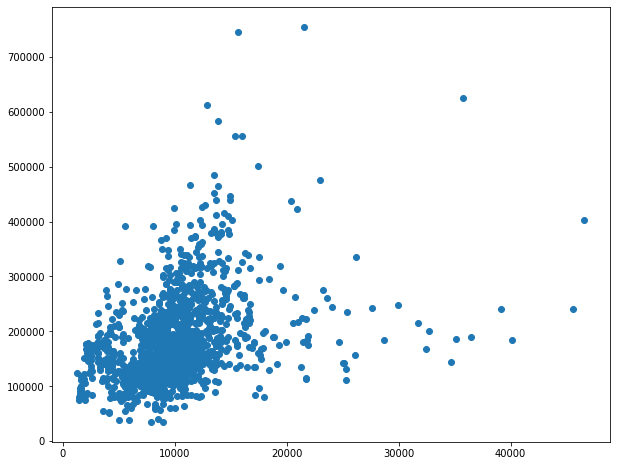

In [97]:
train_data_limit = train_data.loc[train_data['LotArea'] < 50000]
plot_scatter("LotArea", train_data_limit, x_dim=10, y_dim = 8)

Seems intuitively a key variable for analysing sale price

Interesting to look at heatmaps of Sales Price with numerical values

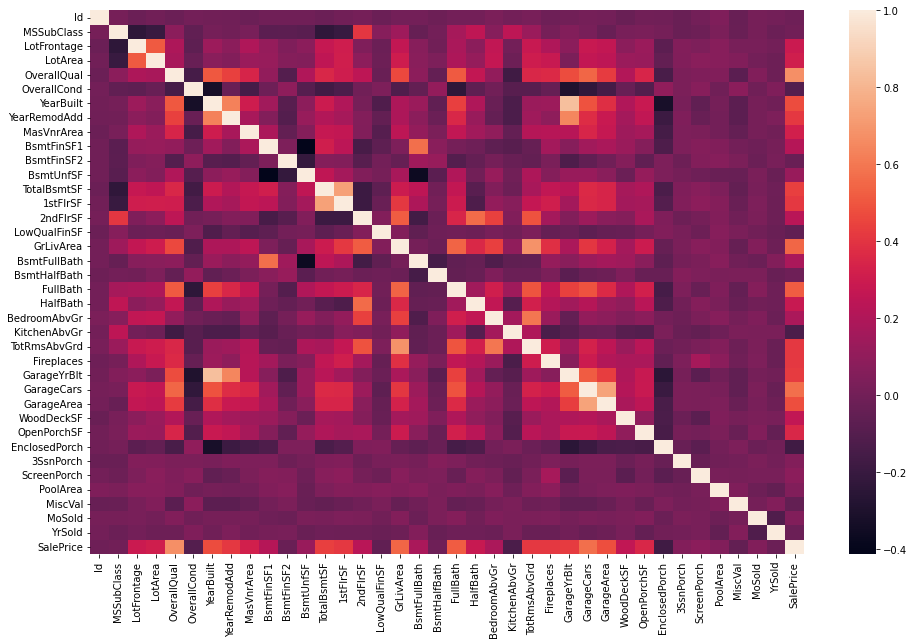

In [103]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train_data_numeric = train_data.select_dtypes(include=numerics)

fig, ax = plt.subplots(figsize = (16,10))
heat = sns.heatmap(train_data_numeric.corr(method='kendall'), annot=False)